In [195]:
!pip install openpyxl

In [329]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
%matplotlib inline

In [278]:
transactdf = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=1, skiprows=1)

cusdf = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=3,skiprows=1)
cusaddressdf = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=4, skiprows=1)

## Data Assessing

In [279]:
transactdf.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.000,Approved,Solex,Standard,medium,medium,71.490,53.620,41245.000
1,2,3,3120,2017-05-21,1.000,Approved,Trek Bicycles,Standard,medium,large,2091.470,388.920,41701.000
2,3,37,402,2017-10-16,0.000,Approved,OHM Cycles,Standard,low,medium,1793.430,248.820,36361.000


In [280]:
cusdf.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.000
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.000
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.000


In [281]:
cusaddressdf.head(3)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9


In [282]:
cusdf =cusdf[['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure']]

In [283]:
cusaddressdf =cusaddressdf[['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation']]

In [284]:
cusdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [285]:
transactdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [286]:
customerdf = pd.merge(cusdf,cusaddressdf, on='customer_id')

In [287]:
customerdf.drop(columns='default', inplace=True)

In [288]:
customerdf.isnull().mean()

In [289]:
customerdf.dropna(subset=['gender','DOB'], inplace=True)

In [290]:
customerdf.gender = customerdf.gender.str[0]

In [291]:
customerdf = customerdf[customerdf['gender'] != 'U']

In [292]:
customerdf.gender = customerdf.gender.str[0].astype('category')

In [293]:
customerdf['age']= 2021 - customerdf.DOB.dt.year

In [294]:
transactdf.isnull().sum()

In [295]:
customerdf.reset_index(drop=True, inplace=True)

In [296]:
customerdf.columns

Index(['customer_id', 'first_name', 'last_name', 'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode', 'state', 'country', 'property_valuation', 'age'], dtype='object')

In [297]:
customerdf.owns_car.value_counts()

In [298]:
customerdf.job_title

In [299]:
customerdf.isnull().mean()

In [300]:
transactdf.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,20000.000,10000.500,5773.647,1.000,5000.750,10000.500,15000.250,20000.000
product_id,20000.000,45.365,30.754,0.000,18.000,44.000,72.000,100.000
customer_id,20000.000,1738.246,1011.951,1.000,857.750,1736.000,2613.000,5034.000
online_order,19640.000,0.500,0.500,0.000,0.000,1.000,1.000,1.000
list_price,20000.000,1107.829,582.825,12.010,575.270,1163.890,1635.300,2091.470
standard_cost,19803.000,556.047,405.956,7.210,215.140,507.580,795.100,1759.850
product_first_sold_date,19803.000,38199.777,2875.201,33259.000,35667.000,38216.000,40672.000,42710.000


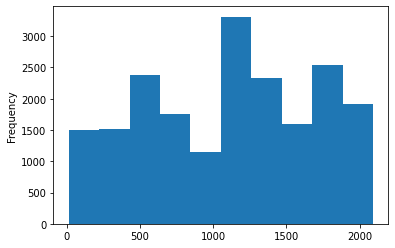

In [301]:
transactdf.list_price.plot(kind = 'hist')

In [302]:
transactdf.product_size.value_counts()

In [303]:
transactdf.product_size = transactdf.product_size.astype('category')

In [304]:
transactdf.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.000,Approved,Solex,Standard,medium,medium,71.490,53.620,41245.000
1,2,3,3120,2017-05-21,1.000,Approved,Trek Bicycles,Standard,medium,large,2091.470,388.920,41701.000
2,3,37,402,2017-10-16,0.000,Approved,OHM Cycles,Standard,low,medium,1793.430,248.820,36361.000
3,4,88,3135,2017-08-31,0.000,Approved,Norco Bicycles,Standard,medium,medium,1198.460,381.100,36145.000
4,5,78,787,2017-10-01,1.000,Approved,Giant Bicycles,Standard,medium,large,1765.300,709.480,42226.000


In [305]:
customerdf.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.000,060 Morning Avenue,2016,New South Wales,Australia,10,68
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.000,6 Meadow Vale Court,2153,New South Wales,Australia,10,41
2,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.000,0 Holy Cross Court,4211,QLD,Australia,9,60


In [306]:
fulldf = pd.merge(transactdf,customerdf, how='inner', on = 'customer_id')

In [307]:
fulldf.groupby('customer_id')[['transaction_date']].max()

,transaction_date
customer_id,
1,2017-12-23
2,2017-08-24
4,2017-06-18
5,2017-12-14
6,2017-10-27
...,...
3496,2017-04-18
3497,2017-11-08
3498,2017-08-25


In [227]:
transactdf.to_excel('transactdf.xlsx')

### Descriptive Analysis

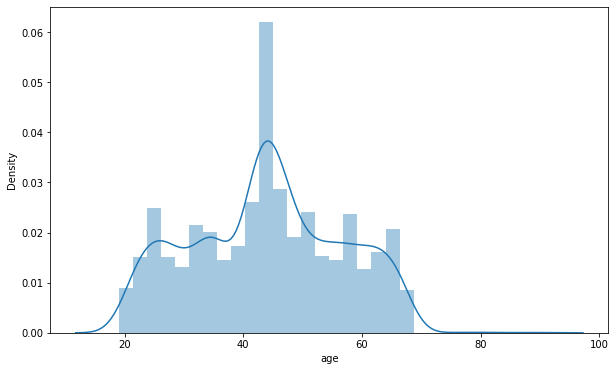

In [308]:
plt.figure(figsize=(10,6))
sns.distplot(customerdf.age)

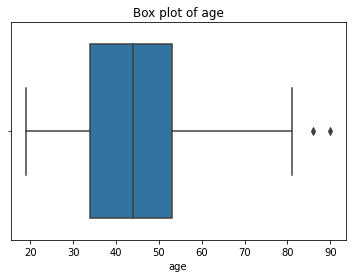

In [309]:
sns.boxplot(customerdf.age)
plt.title('Box plot of age')
plt.show()

In [310]:
fulldf.groupby('wealth_segment')[['transaction_id']].count()

,transaction_id
wealth_segment,
Affluent Customer,4765
High Net Worth,4965
Mass Customer,9783


In [311]:
fulldf['profit'] =fulldf.list_price - fulldf.standard_cost

In [312]:
fulldf.groupby('product_id')[['profit']].mean().sort_values('profit', ascending = False).head(10)

,profit
product_id,
3,1702.550
44,1660.880
57,1630.250
73,1612.250
68,1592.190
37,1544.610
83,1408.910
63,1349.247
46,1323.965


In [313]:
# Create yearmont columns
fulldf.insert(4, 'year_month',fulldf.transaction_date.dt.to_period('M'))

In [314]:
# revenue and profit per month
yearmonth = fulldf.groupby('year_month')[['list_price','profit']].sum()
yearmonth.columns = ['revenue', 'profit']
yearmonth

,revenue,profit
year_month,,
2017-01,1815620.790,903117.950
2017-02,1768982.620,854247.670
2017-03,1765982.690,852913.830
2017-04,1784131.610,877253.210
2017-05,1875694.920,898367.460
2017-06,1701528.080,834076.150
2017-07,1837210.280,910387.590
2017-08,1882308.190,939474.660
2017-09,1703411.160,842762.480


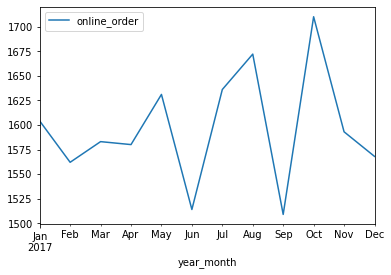

In [315]:
# Transaction per month
fulldf.groupby('year_month')[['online_order']].count().plot()

-----------------------

# RFM Analysis and Customer Classification

In [316]:
fulldf.head(1)

,transaction_id,product_id,customer_id,transaction_date,year_month,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age,profit
0,1,2,2950,2017-02-25,2017-02,0.000,Approved,Solex,Standard,medium,medium,71.490,53.620,41245.000,Kristos,Anthony,M,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.000,984 Hoepker Court,3064,VIC,Australia,6,66,17.870


### Calculate RFM 

In [317]:
rfm = fulldf.groupby('customer_id')[['transaction_id']].count()

In [318]:
rfm.columns = ['Frequency']

In [319]:
rfm['Monetary'] = fulldf.groupby('customer_id')['profit'].mean()

In [330]:
fulldf['comparedate'] = pd.to_datetime('2017-12-31')
fulldf['datediff'] = fulldf['comparedate'] - fulldf['transaction_date']
fulldf['datediff'] = fulldf['datediff'].astype('str').str.extract(r'(\d+)')
fulldf['datediff'] = fulldf['datediff'].astype('int')

In [338]:
rfm['Recency'] = fulldf.groupby('customer_id')[['datediff']].min()

In [241]:
rfm.Recency = rfm.Recency.astype('str').str.extract(r'(\d+)')
rfm.Recency = rfm.Recency.astype('int')

In [339]:
rfm.head()

,Frequency,Monetary,Recency
customer_id,,,
1,11,274.372,8
2,3,742.087,129
4,2,110.285,196
5,6,399.157,17
6,5,789.310,65


In [340]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Frequency,3412.000,5.719,2.324,1.000,4.000,6.000,7.000,14.000
Monetary,3412.000,549.060,236.942,15.080,384.636,530.237,695.197,1702.550
Recency,3412.000,62.095,57.949,1.000,19.000,45.000,86.000,354.000


### Calculate Score of RFM

In [341]:
def r_score(x):
    if x <= np.percentile(rfm.Recency,20):
        return 5
    elif x <= np.percentile(rfm.Recency,40):
        return 4
    elif x <= np.percentile(rfm.Recency,60):
        return 3
    elif x <= np.percentile(rfm.Recency,80):
        return 2
    else:
        return 1

def f_score(x):
    if x <= np.percentile(rfm.Frequency,20):
        return 1
    elif x <= np.percentile(rfm.Frequency,40):
        return 2
    elif x <= np.percentile(rfm.Frequency,60):
        return 3
    elif x <= np.percentile(rfm.Frequency,80):
        return 4
    else:
        return 5 
    
def m_score(x):
    if x <= np.percentile(rfm.Monetary,20):
        return 1
    elif x <= np.percentile(rfm.Monetary,40):
        return 2
    elif x <= np.percentile(rfm.Monetary,60):
        return 3
    elif x <= np.percentile(rfm.Monetary,80):
        return 4
    else:
        return 5 

In [342]:
rfm['R'] = rfm['Recency'].apply(r_score)
rfm['F'] = rfm['Frequency'].apply(f_score)
rfm['M'] = rfm['Monetary'].apply(m_score)

In [343]:
#Store rfm Data
rfm.to_csv('rfm.csv')

In [344]:
rfm = pd.read_csv('rfm.csv')

In [345]:
rfm['RFM_Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_id,Frequency,Monetary,Recency,R,F,M,RFM_Score
0,1,11,274.372,8,5,5,1,551
1,2,3,742.087,129,1,1,5,115
2,4,2,110.285,196,1,1,1,111
3,5,6,399.157,17,4,3,2,432
4,6,5,789.310,65,2,2,5,225


# Customer Classification with RFM Table

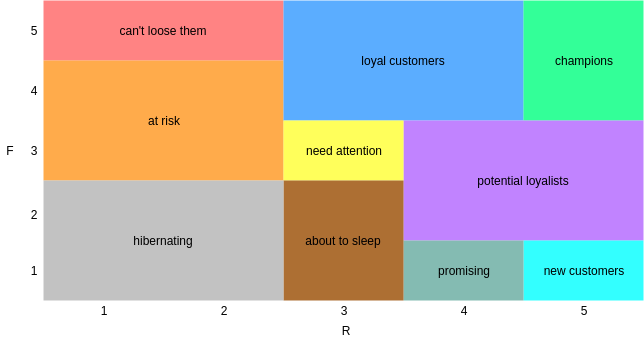

In [346]:
from IPython.display import Image
Image(filename='1_TjJt4rUiBtXLAF84--V-Cg.png')

In [347]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm

,customer_id,Frequency,Monetary,Recency,R,F,M,RFM_Score,Segment
0,1,11,274.372,8,5,5,1,551,champions
1,2,3,742.087,129,1,1,5,115,hibernating
2,4,2,110.285,196,1,1,1,111,hibernating
3,5,6,399.157,17,4,3,2,432,potential loyalists
4,6,5,789.310,65,2,2,5,225,hibernating
...,...,...,...,...,...,...,...,...,...
3407,3496,4,511.460,257,1,1,3,113,hibernating
3408,3497,3,549.440,53,3,1,3,313,about to sleep
3409,3498,6,524.555,128,1,3,3,133,at risk
3410,3499,7,707.893,52,3,4,4,344,loyal customers


# Customer Classification with K-means Clustering

In [348]:
rfm1 = pd.read_csv('rfm.csv',index_col='customer_id')

In [349]:
rfm1 = rfm1[['Frequency', 'Monetary', 'Recency']]
rfm1

,Frequency,Monetary,Recency
customer_id,,,
1,11,274.372,8
2,3,742.087,129
4,2,110.285,196
5,6,399.157,17
6,5,789.310,65
...,...,...,...
3496,4,511.460,257
3497,3,549.440,53
3498,6,524.555,128


In [350]:
#StandardScaler to standarize
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

RFMnorm = scaler.fit_transform(rfm1)
RFMnorm

In [351]:
# Let Check Scaler
print(RFMnorm.mean(axis = 0))
print(RFMnorm.std(axis = 0))

[1.39526270e-16 1.66598531e-16 3.54021879e-17]
[1. 1. 1.]


In [352]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=2)
    kmeanModel.fit(RFMnorm)
    distortions.append(kmeanModel.inertia_)

In [353]:
distortions

[10236.000000000011,
 7350.99843420529,
 5660.546138644165,
 4319.0614263467,
 3883.3433881448336,
 3482.9502564812037,
 3143.413419116767,
 2856.7403026824136,
 2602.471143259374]

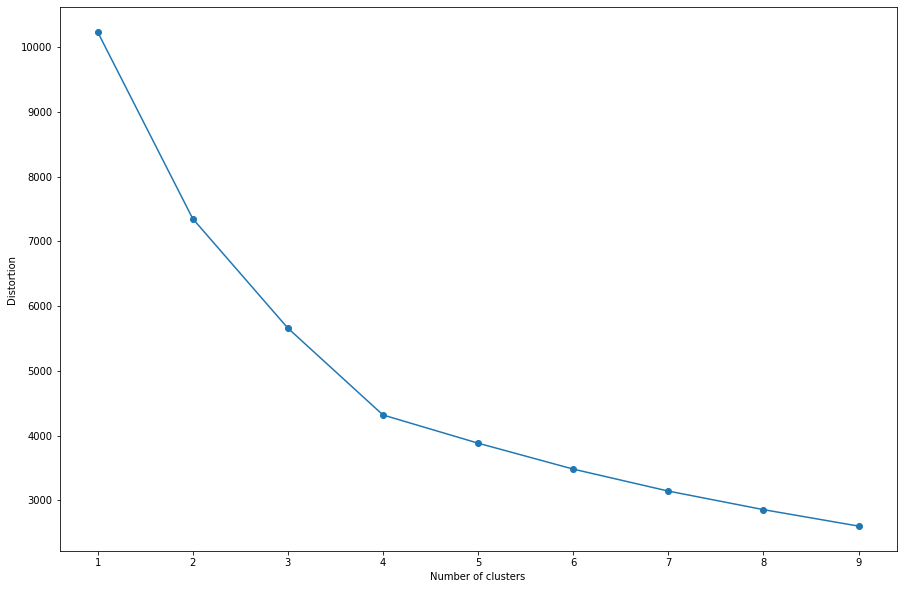

In [354]:
# plot
plt.figure(figsize=(15, 10))
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [355]:
model = KMeans(n_clusters=4, random_state=2) 

model.fit(RFMnorm) 

KMeans(n_clusters=4, random_state=2)

In [356]:
rfm1["Cluster"] = model.labels_

rfm1.head(10)

,Frequency,Monetary,Recency,Cluster
customer_id,,,,
1,11,274.372,8,0
2,3,742.087,129,3
4,2,110.285,196,3
5,6,399.157,17,1
6,5,789.310,65,2
7,3,73.370,254,3
8,10,706.694,23,0
9,6,392.185,79,1
11,6,606.473,47,1


In [357]:
# Check centroid on each cluster
rfm1.groupby("Cluster").mean()

,Frequency,Monetary,Recency
Cluster,,,
0,8.569,538.870,36.011
1,4.830,387.718,43.689
2,4.863,834.792,52.400
3,3.762,487.337,173.131


In [358]:
import plotly.graph_objects as go

ClusterPlot = go.Figure() 

for C in list(rfm1.Cluster.unique()): 
    
    ClusterPlot.add_trace(go.Scatter3d(x = rfm1[rfm1.Cluster == C]['Recency'], 
                                y = rfm1[rfm1.Cluster == C]['Frequency'],
                                z = rfm1[rfm1.Cluster == C]['Monetary'],
                                mode = 'markers', marker_size = 5, marker_line_width = 1,
                                name = 'Group ' + str(C)))


ClusterPlot.update_layout(width = 1000, height = 1000, autosize = True, showlegend = True, 
                   scene = dict(xaxis=dict(title = 'Recency', titlefont_color = 'black'),
                                yaxis=dict(title = 'Frequency', titlefont_color = 'black'),
                                zaxis=dict(title = 'Monetary', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

ClusterPlot

Unsupported